### Imports

In [1]:
import numpy as np

import sympy as sym

import itertools

import pandas as pd

In [2]:
from operator import itemgetter

In [3]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 10

## Evolutionary simulations

In [5]:
# df_one_bit = pd.read_csv("../evolution_over_c_and_beta_one_bit.csv", index_col=0)

In [20]:
df = pd.read_csv("../evolution_over_c_and_beta_two_bits_counting.csv", index_col=0)

In [23]:
df_three_bits = pd.read_csv("../evolution_over_c_and_beta_three_bits_counting.csv", index_col=0)

In [24]:
colors = {"one-bit": "tab:orange", "two-bit": "tab:green", "three-bit": "tab:blue"}

colors_idx = ["tab:orange", "tab:green", "tab:blue"]

linestyles = ['-o', '--o', ':o']

labels_idx = ['one-bit', 'two-bits', 'three-bits']

In [25]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=10"]

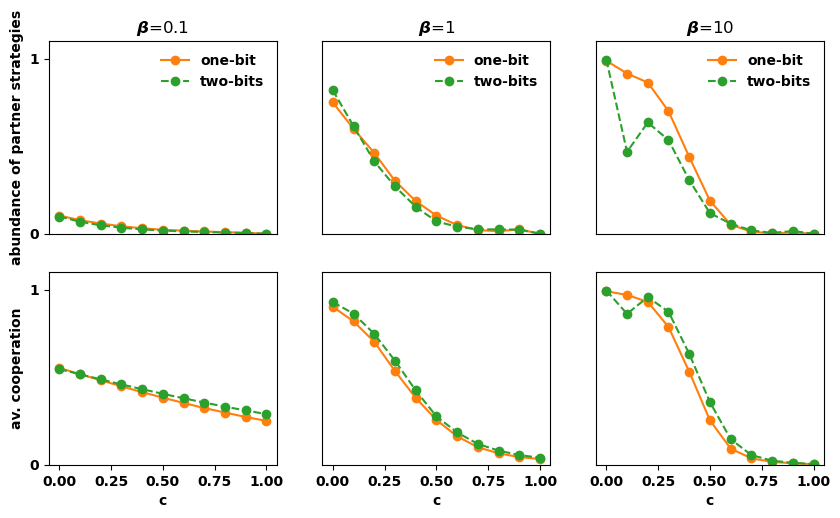

In [27]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 5.5))

for i, df in enumerate([df, df_three_bits]):
    groups_beta = df.groupby("beta")
    
    for j, (beta, group) in enumerate(groups_beta):
        
        
    
        points = []
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())
        
        
        axes[0, j].plot(np.linspace(0, 1, 11), abudance, linestyles[i], color=colors_idx[i],
                     label=labels_idx[i])
        
        axes[1, j].plot(np.linspace(0, 1, 11), points, linestyles[i], color=colors_idx[i],
             label=labels_idx[i])
        
for i in range(3):
    axes[0, i].set_ylim(0, 1.1)
    axes[1, i].set_ylim(0, 1.1)

    axes[0, i].set_yticks(np.arange(0, 2))
    axes[1, i].set_yticks(np.arange(0, 2))

    axes[1, i].set_xlabel("c")
    axes[0, i].set_title(labels[i])
    
    axes[0, i].legend(framealpha=0)
    
for i in range(1, 3):
    axes[0, i].set_yticks([]);
    axes[1, i].set_yticks([]);
    
for i in range(3):
    axes[0, i].set_xticks([]);
    
    

axes[1, 0].set_ylabel("av. cooperation");

axes[0, 0].set_ylabel("abundance of partner strategies");

# fig.savefig("../figures/abundance_of_partner_strategies.pdf", bbox_inches='tight')

## Over seeds

In [13]:
df = pd.read_csv("./evolution_over_seeds.csv", index_col=0)

In [14]:
dists = []

In [15]:
groups = df[df['type'] == 'one'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2',
                                                               'frequencies']].values))
    
p1, p2, freqs1 = zip(*per_seed)

dists.append([p1, p2])

In [16]:
groups = df[df['type'] == 'two'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2', 'p_3', 'p_4',
                                                               'frequencies']].values))
    
p1, p2, p3, p4, freqs2 = zip(*per_seed)

dists.append([p1, p2, p3, p4])

In [17]:
groups = df[df['type'] == 'three'].groupby("seed")

per_seed = []

for _, group in groups:
    per_seed.append(tuple(group.iloc[group['frequencies'].idxmax()][['p_1',
                                                               'p_2', 'p_3', 'p_4',
                                                               'p_5', 'p_6', 'p_7',
                                                                     'p_8',
                                                               'frequencies']].values))
    
p1, p2, p3, p4, p5, p6, p7, p8, freqs3 = zip(*per_seed)

dists.append([p1, p2, p3, p4, p5, p6, p7, p8])

In [42]:
labels = ['one-bit', 'two-bit', 'three-bit']

In [43]:
colours = ['tab:orange', 'tab:green', 'tab:blue']

dims = [2, 4, 8]

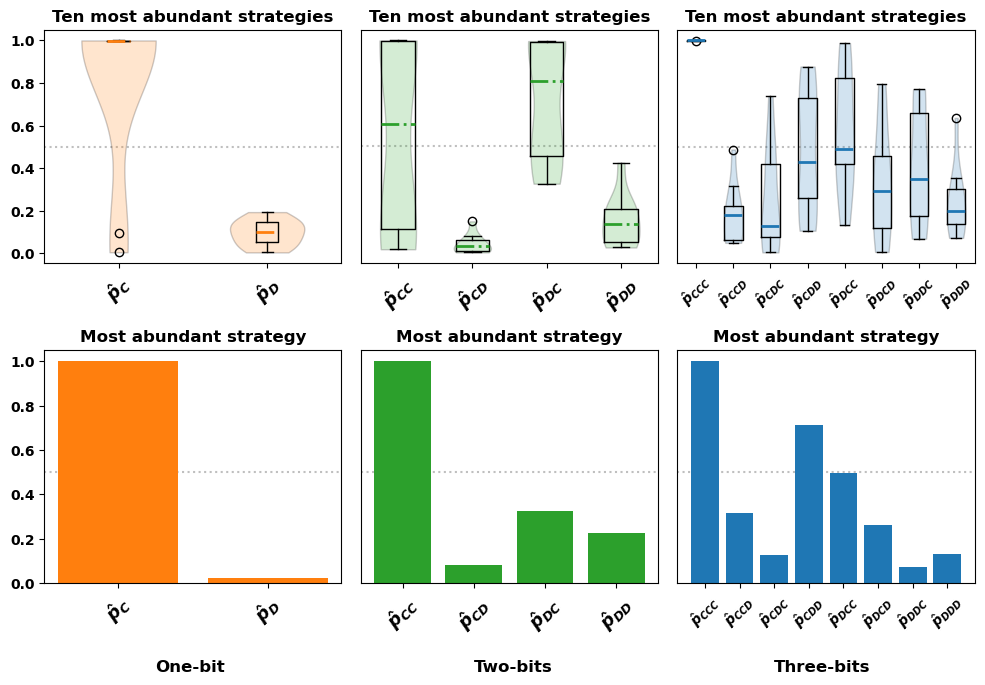

In [47]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 7))

for i, dist in enumerate(dists):

    parts = axes[0, i].violinplot(dist, showextrema=False,
                            showmeans=False);

    boxes = axes[0, i].boxplot(dist)

    for pc in parts['bodies']:
        pc.set_facecolor(colors[labels[i]])
        pc.set_edgecolor('black')
        pc.set_alpha(.20)

    for bp in boxes['medians']:
        bp.set_color(colors[labels[i]])
        bp.set_linewidth(2)
        bp.set_linestyle('-.')
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(1)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(1)
        
for i, freq in enumerate([freqs1, freqs2, freqs3]):
    idx = np.argmax(freq)
    points = [p[idx] for p in dists[i]]
    
    axes[1, i].bar(range(1, len(points) + 1), points, color=colors[labels[i]])
        
axes[0, 0].set_title("Ten most abundant strategies", fontsize=12, fontweight='bold')
axes[0, 1].set_title("Ten most abundant strategies", fontsize=12, fontweight='bold')
axes[0, 2].set_title("Ten most abundant strategies", fontsize=12, fontweight='bold')

axes[1, 0].set_title("Most abundant strategy", fontsize=12, fontweight='bold')
axes[1, 1].set_title("Most abundant strategy", fontsize=12, fontweight='bold')
axes[1, 2].set_title("Most abundant strategy", fontsize=12, fontweight='bold')

axes[1, 0].text(1.25, -.4, "One-bit", fontweight="bold", fontsize=12)
axes[1, 1].text(2, -.4, "Two-bits", fontweight="bold", fontsize=12)
axes[1, 2].text(3, -.4, "Three-bits", fontweight="bold", fontsize=12)


for i in range(2):
    
    axes[i, 0].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
    axes[i, 1].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)
    axes[i, 2].axhline(0.5, linestyle=':', color='grey', zorder=0, alpha=0.5)

    axes[i, 0].set_xticks([1, 2])
    axes[i, 0].set_xticklabels(["$\hat{p}_C$", "$\hat{p}_D$"], rotation=45,
                              fontsize=13)
#     axes[i, 0].set_ylabel("cooperation probability")


    axes[i, 1].set_xticks([1, 2, 3, 4])
    axes[i, 1].set_xticklabels(["$\hat{p}_{CC}$",
                                "$\hat{p}_{CD}$",
                                "$\hat{p}_{DC}$",
                                "$\hat{p}_{DD}$"], rotation=45,
                              fontsize=13)
    
    axes[i, 2].set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
    axes[i, 2].set_xticklabels(["$\hat{p}_{CCC}$", 
                                "$\hat{p}_{CCD}$", 
                                "$\hat{p}_{CDC}$", 
                                "$\hat{p}_{CDD}$", 
                                "$\hat{p}_{DCC}$", 
                                "$\hat{p}_{DCD}$", 
                                "$\hat{p}_{DDC}$", 
                                "$\hat{p}_{DDD}$"], rotation=45, fontsize=10)
    
for i in range(1, 3):
    axes[0, i].set_yticks([]);
    axes[1, i].set_yticks([]);
    
fig.tight_layout();

fig.savefig("../figures/abundant_strategies.pdf", bbox_inches='tight')